In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
flights = pd.read_excel('D:/DataScience/Assignment/FeatureEngineering/flight_price.xlsx')
flights.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [3]:
flights.shape

(10683, 11)

There are total of *10683* rows and *11* columns.

# Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution

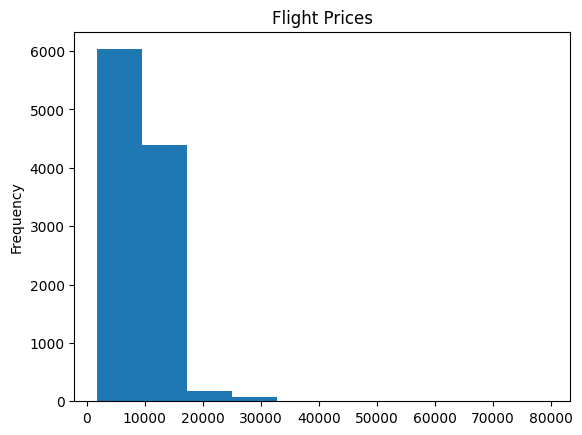

In [4]:
flights['Price'].plot(kind='hist', title='Flight Prices')
plt.show()

# Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [5]:
flights['Price'].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

Min price = 1759 <br>
Max price = 79512 <br>
Range : 1759 - 79512

# Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

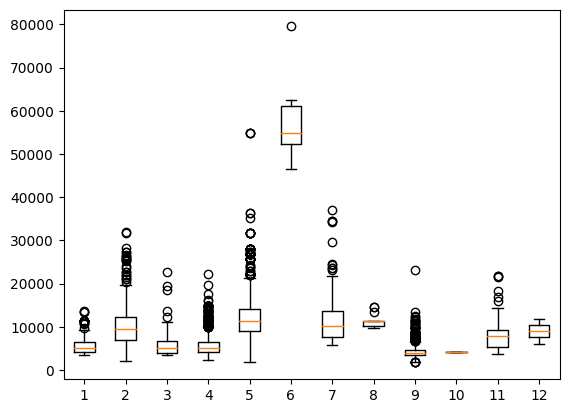

In [6]:
plt.plot()
plt.boxplot(x=flights.groupby('Airline')['Price'].apply(list))

plt.show()

# Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

<Axes: >

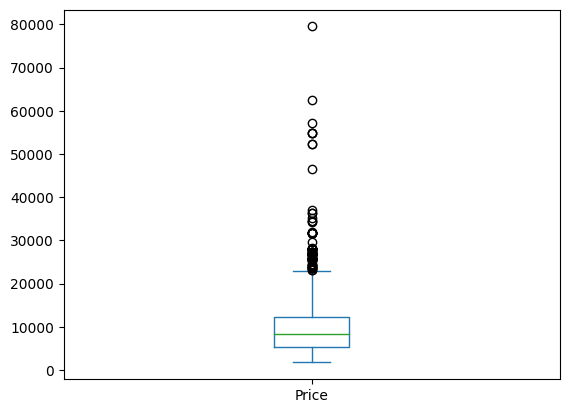

In [7]:
flights['Price'].plot(kind='box')

As shown in the above box plot, there are many outliers in the dataset. Outliers may cause wrong predictions of prices for test dataset. They will cause inaccurate analysis.

# Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

In [8]:
flights['Date_of_Journey'] = pd.to_datetime(flights.Date_of_Journey, dayfirst=True)

In [9]:
temp = flights['Date_of_Journey'].dt.month.value_counts()
temp

Date_of_Journey
5    3466
6    3414
3    2724
4    1079
Name: count, dtype: int64

In [10]:
temp = pd.DataFrame(temp)
temp

,count
Date_of_Journey,
5,3466
6,3414
3,2724
4,1079


In [11]:
temp['Month'] = [5,6,3,4]
temp

,count,Month
Date_of_Journey,,
5,3466,5
6,3414,6
3,2724,3
4,1079,4


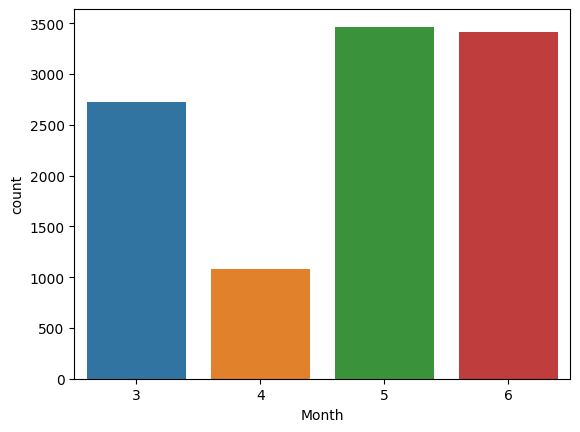

In [12]:
plt.plot()
sns.barplot(data=temp, x='Month', y='count')
plt.show()

There are more flight bookings in the month of may and june because vacation season

# Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?


In [13]:
flights.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


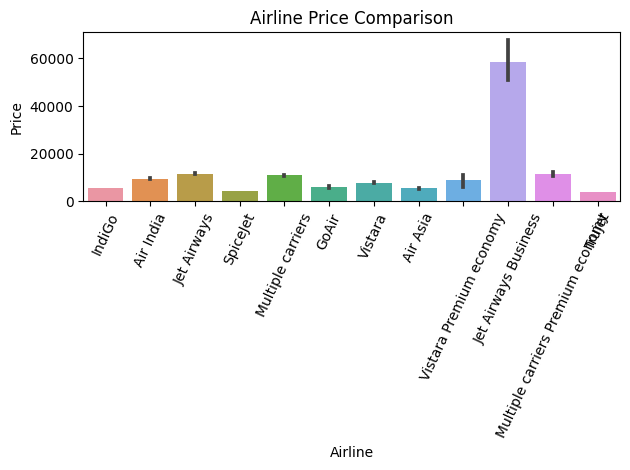

In [14]:
sns.barplot(data=flights, x=flights['Airline'], y=flights['Price'])
plt.title('Airline Price Comparison')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=65)
plt.tight_layout()
plt.show()

- The above graph shows **Price of Ticket** based on the **Airline**.

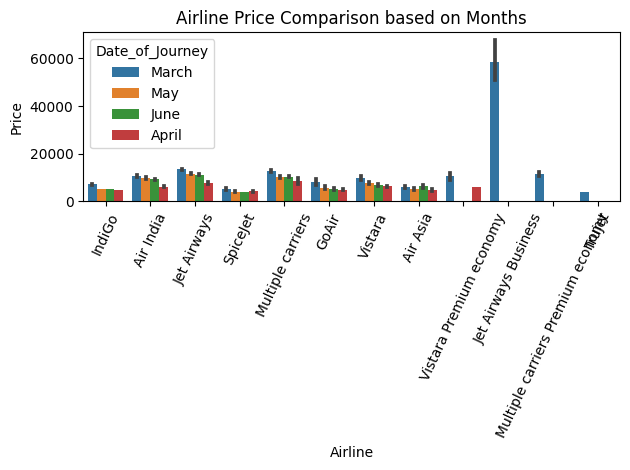

In [15]:
sns.barplot(data=flights, x=flights['Airline'], y=flights['Price'], hue=flights['Date_of_Journey'].dt.month_name())
plt.title('Airline Price Comparison based on Months')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=65)
plt.tight_layout()
plt.show()

- The above graph shows the **Price comparison** between differnet **Airline** with **Different Months**

In [16]:
flights.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [17]:
flights['Duration Approx.'] = 0
i=0
for time in flights['Duration']:
    flights['Duration Approx.'].iloc[i] = time[0]
    i+=1
    #print(time[0])

In [18]:
flights.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration Approx.
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,7
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,1
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,4


In [19]:
flights['Duration Approx.'].nunique()

9

In [20]:
flights['Duration Approx.'] = flights['Duration Approx.'].astype(int)
flights.dtypes

Airline                     object
Date_of_Journey     datetime64[ns]
Source                      object
Destination                 object
Route                       object
Dep_Time                    object
Arrival_Time                object
Duration                    object
Total_Stops                 object
Additional_Info             object
Price                        int64
Duration Approx.             int32
dtype: object

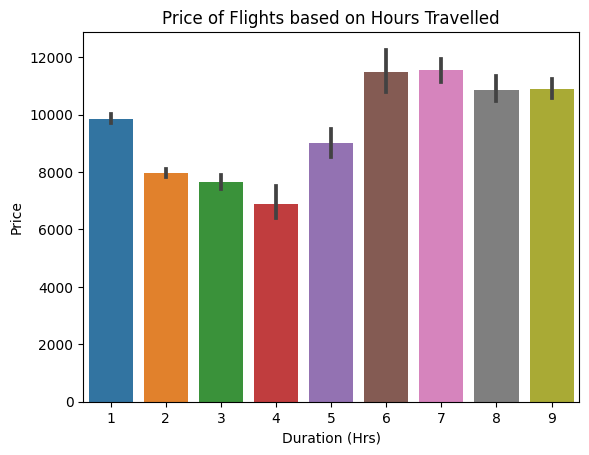

In [21]:
sns.barplot(data=flights, x=flights['Duration Approx.'], y=flights['Price'])
plt.title('Price of Flights based on Hours Travelled')
plt.xlabel('Duration (Hrs)')
plt.show()

- The above graph shows the **Price** of flight based on **Duration of Flight**.(Note: The duration is in range. i.e. 1 means 1+ hours and 2 means 2+ hours)

In [22]:
flights['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

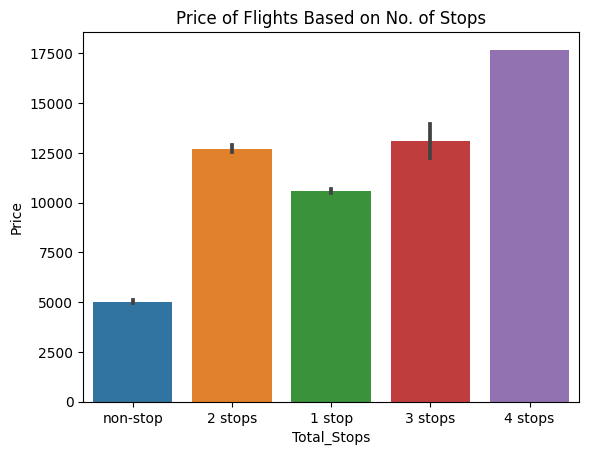

In [23]:
sns.barplot(data=flights, x=flights['Total_Stops'], y=flights['Price'])
plt.title('Price of Flights Based on No. of Stops')
plt.show()

- The above graph shows the **Price of Flights** based on **No. of Stops**

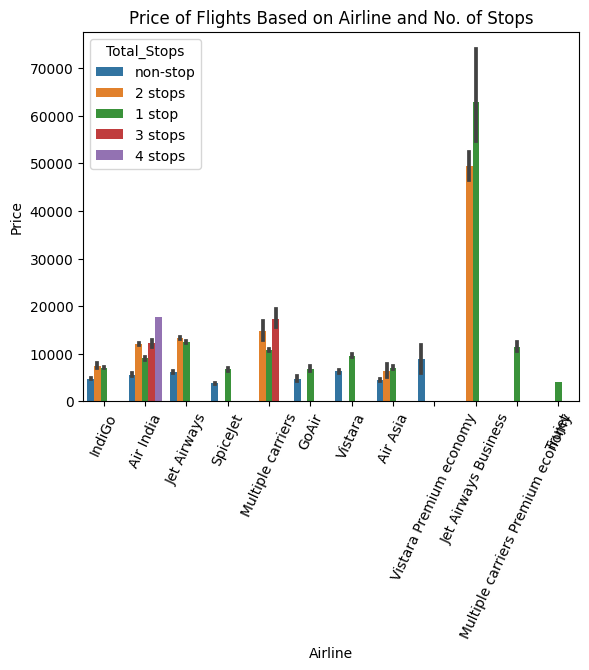

In [24]:
sns.barplot(data=flights, x=flights['Airline'], y=flights['Price'], hue=flights['Total_Stops'])
plt.xticks(rotation=65)
plt.title('Price of Flights Based on Airline and No. of Stops')
plt.show()

- The above graph shows **Price of Flight** based on **Airline** and **No of Stops**.

# Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

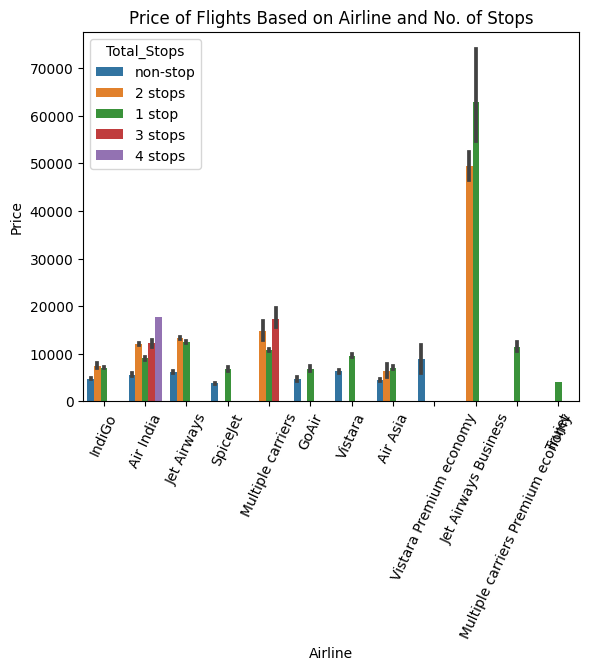

In [25]:
sns.barplot(data=flights, x=flights['Airline'], y=flights['Price'], hue=flights['Total_Stops'])
plt.xticks(rotation=65)
plt.title('Price of Flights Based on Airline and No. of Stops')
plt.show()

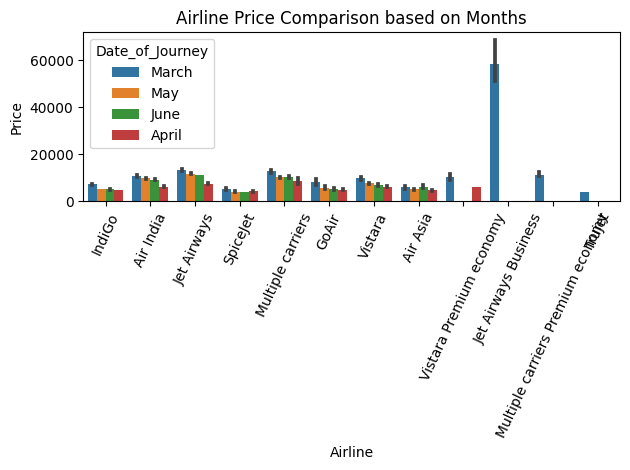

In [26]:
sns.barplot(data=flights, x=flights['Airline'], y=flights['Price'], hue=flights['Date_of_Journey'].dt.month_name())
plt.title('Airline Price Comparison based on Months')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=65)
plt.tight_layout()
plt.show()

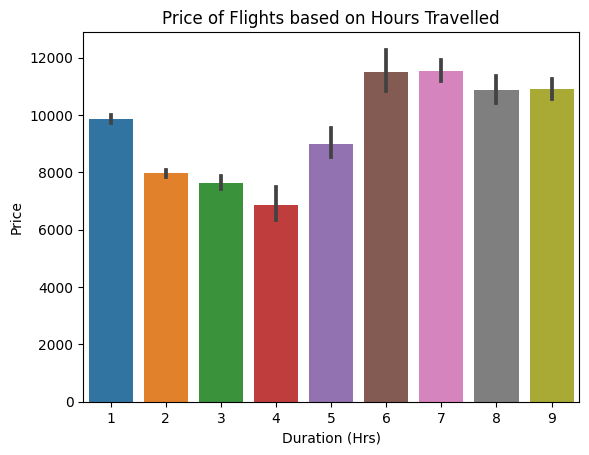

In [27]:
sns.barplot(data=flights, x=flights['Duration Approx.'], y=flights['Price'])
plt.title('Price of Flights based on Hours Travelled')
plt.xlabel('Duration (Hrs)')
plt.show()

## First Graph:

- As per the first graph, we can notice that *Vistatra Premium Economy* charges highest among all the Airlines.
- Prices are higher in *3-4 stop flights* compared to others.

## Second Graph:

- As per second graph, we can  notice that all the airlines charges higher amount in the month of March.

## Third Graph:

- By looking at the Third Graph we can see that there is *No Special Relation* between *Duration and Price*.

$$ Google Play Store Dataset $$

In [28]:
playStore = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
playStore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [29]:
playStore.duplicated().sum()

483

In [30]:
playStore = playStore.drop_duplicates()

In [31]:
playStore = playStore.reset_index(drop=True)

In [32]:
playStore.shape

(10358, 13)

# Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have??

In [33]:
playStore.shape

(10358, 13)

- The dataset has 10841 rows and 13 columns, after removing the duplicate values there are 10358 rows and 13 columns.

# Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories..

In [34]:
playStore.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

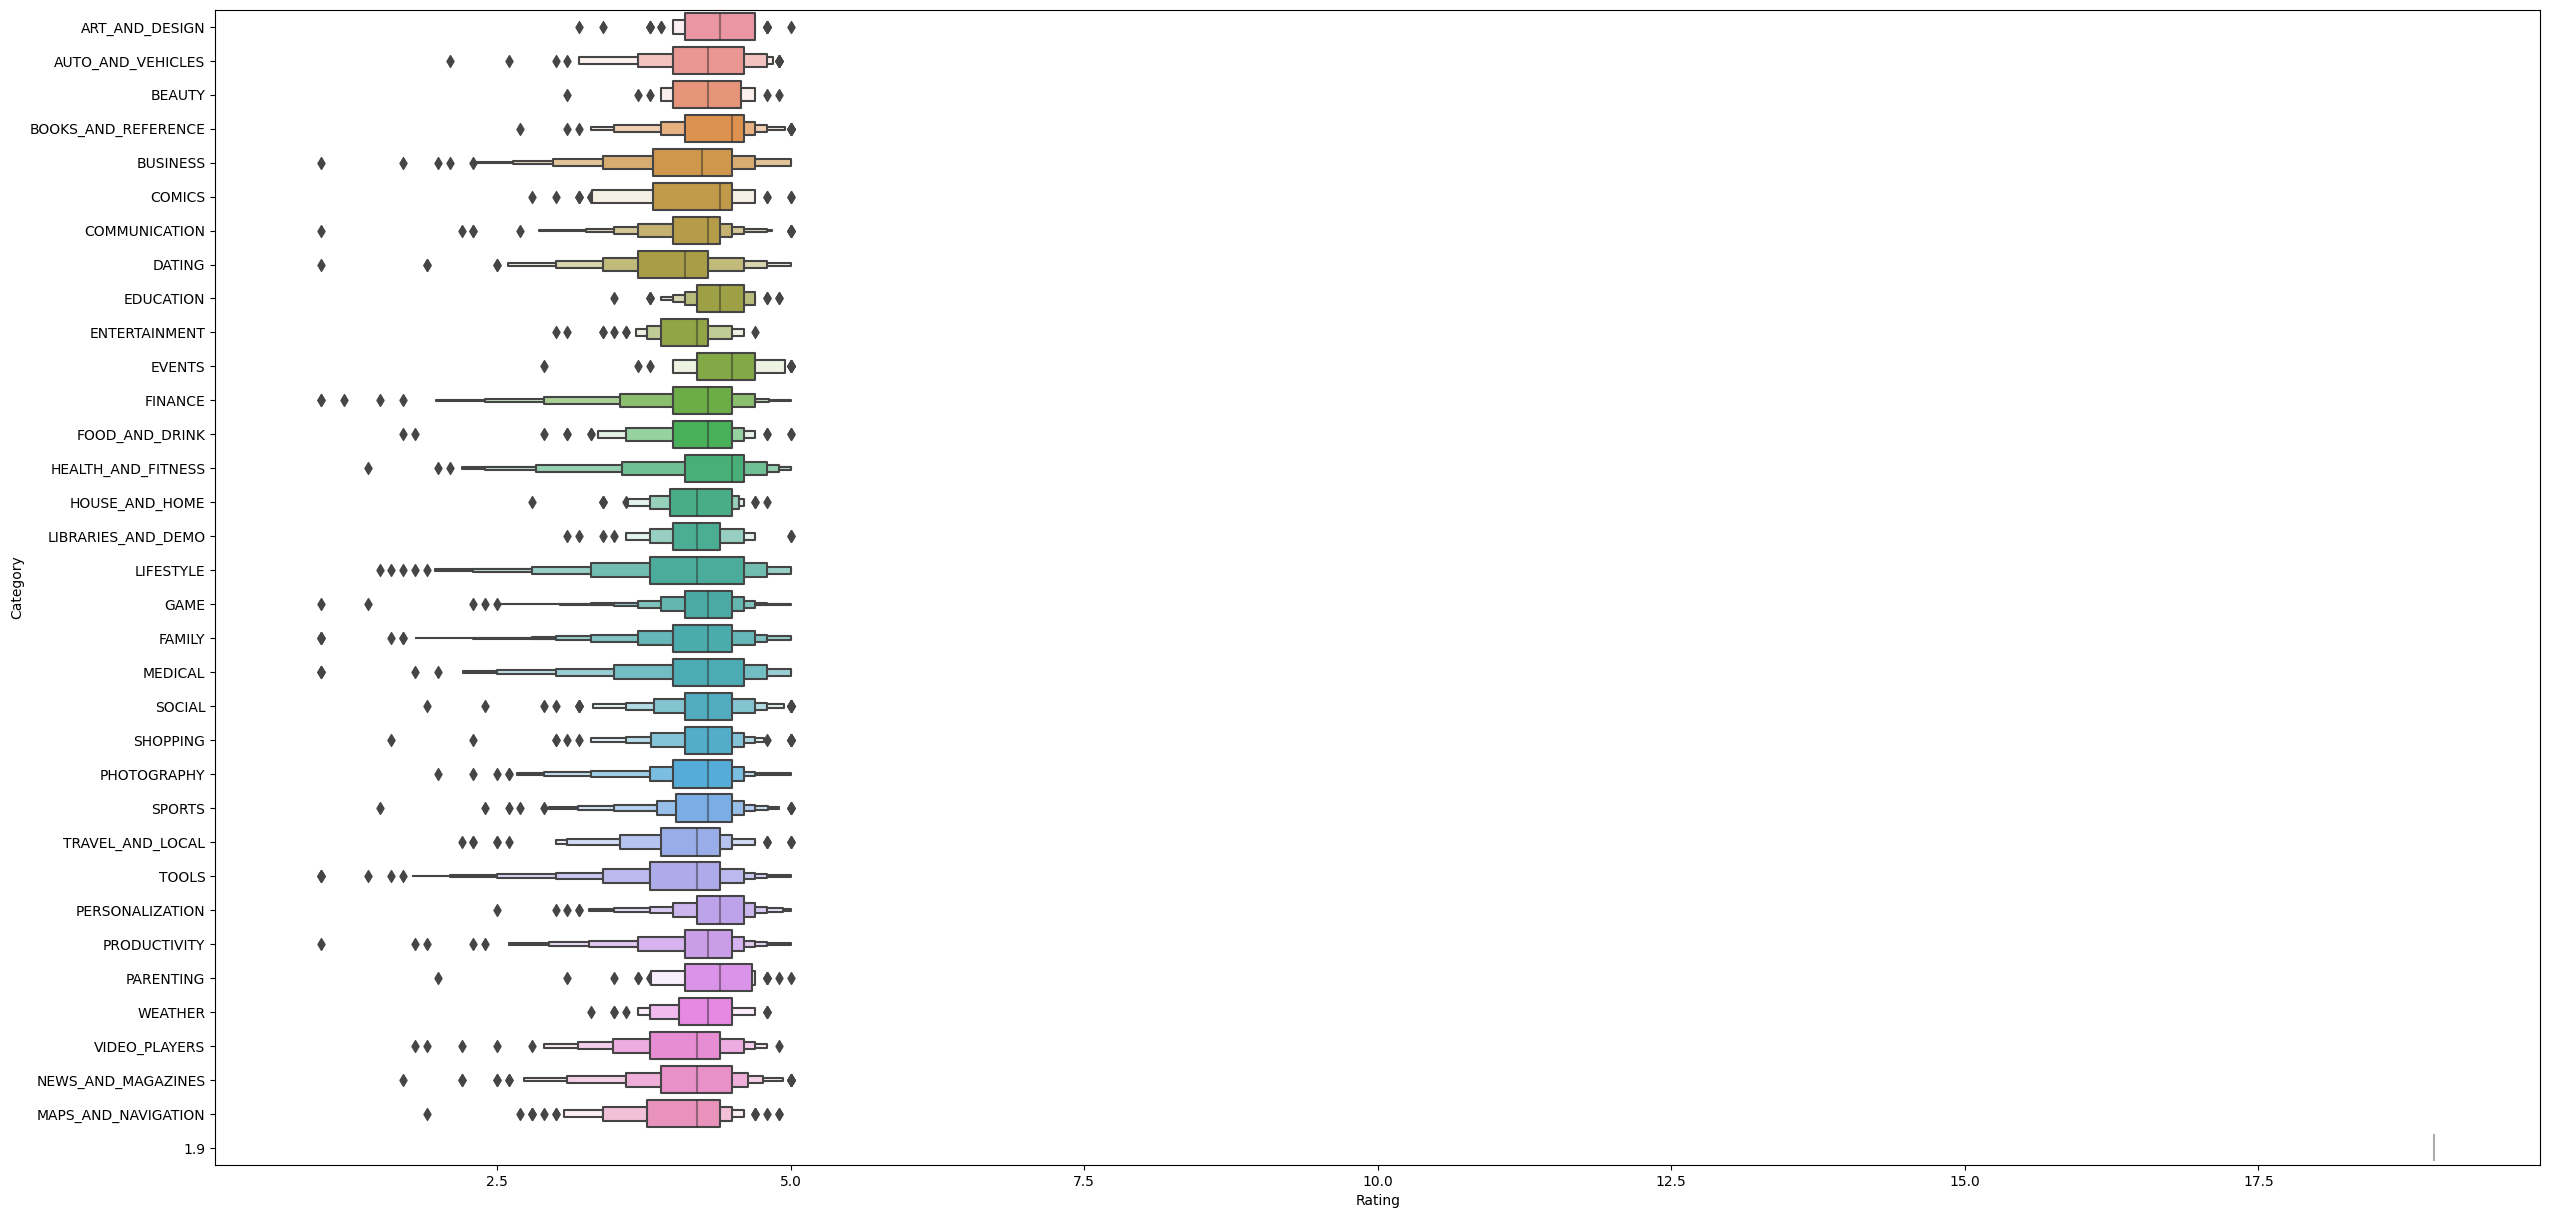

In [35]:
plt.figure(figsize=(30,15))
sns.boxenplot(data=playStore, y=playStore['Category'], x=playStore['Rating'], orient='h')
plt.show()

# Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis..

In [36]:
playStore.isna().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

- Yes, there are missing values in dataset as shown above.
-  Identifying and appropriately handling missing values is crucial for ensuring the validity and reliability of your data analysis and modeling results.

# Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationshipp

In [37]:
playStore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [38]:
playStore['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [39]:
playStore['Size'] = playStore['Size'].str.replace('M', '000')
playStore['Size'] = playStore['Size'].str.replace('k', '')
playStore['Size'] = playStore['Size'].str.replace('+', '')
playStore['Size'] = playStore['Size'].replace('Varies with device', np.nan)
playStore['Size'] = playStore['Size'].str.replace(',', '.')

In [40]:
playStore.Size = playStore.Size.astype('float')
playStore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            8832 non-null   float64
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [41]:
playStore['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [42]:
playStore.Reviews.str.isnumeric().sum()

10357

In [43]:
playStore.shape

(10358, 13)

In [44]:
playStore[~playStore['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9990,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,1.0,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [45]:
playStore = playStore.drop(playStore.index[9990])

In [46]:
playStore['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

[]

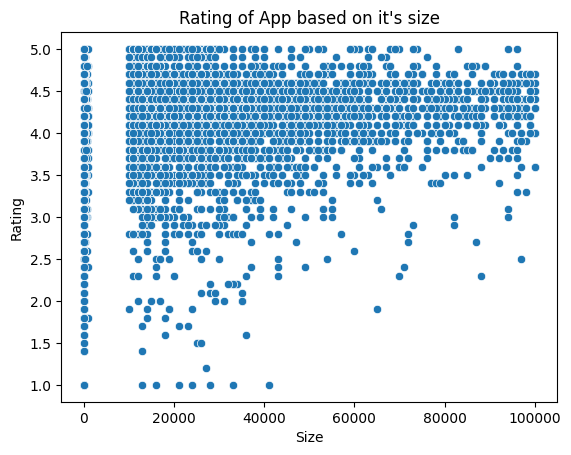

In [47]:
sns.scatterplot(data=playStore, x='Size', y='Rating')
plt.title("Rating of App based on it's size")
plt.plot()

# Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type

In [57]:
playStore.Type.unique()

array(['Free', 'Paid', nan], dtype=object)

In [58]:
paid_apps = playStore.query('Type=="Paid"')

In [59]:
paid_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
233,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
234,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.0,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
390,Puffin Browser Pro,COMMUNICATION,4.0,18247,NaN,"100,000+",Paid,$3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
429,"Moco+ - Chat, Meet People",DATING,4.2,1545,NaN,"10,000+",Paid,$3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up
430,Calculator,DATING,2.6,57,6.2,"1,000+",Paid,$6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up


In [64]:
paid_apps.Price = paid_apps.Price.str.replace('$', '')

In [65]:
paid_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
233,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,"100,000+",Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
234,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.0,"100,000+",Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
390,Puffin Browser Pro,COMMUNICATION,4.0,18247,NaN,"100,000+",Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
429,"Moco+ - Chat, Meet People",DATING,4.2,1545,NaN,"10,000+",Paid,3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up
430,Calculator,DATING,2.6,57,6.2,"1,000+",Paid,6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up


In [66]:
paid_apps.Price = paid_apps.Price.astype('float')

In [67]:
paid_apps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 765 entries, 233 to 10315
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             765 non-null    object 
 1   Category        765 non-null    object 
 2   Rating          613 non-null    float64
 3   Reviews         765 non-null    object 
 4   Size            691 non-null    float64
 5   Installs        765 non-null    object 
 6   Type            765 non-null    object 
 7   Price           765 non-null    float64
 8   Content Rating  765 non-null    object 
 9   Genres          765 non-null    object 
 10  Last Updated    765 non-null    object 
 11  Current Ver     763 non-null    object 
 12  Android Ver     764 non-null    object 
dtypes: float64(3), object(10)
memory usage: 83.7+ KB


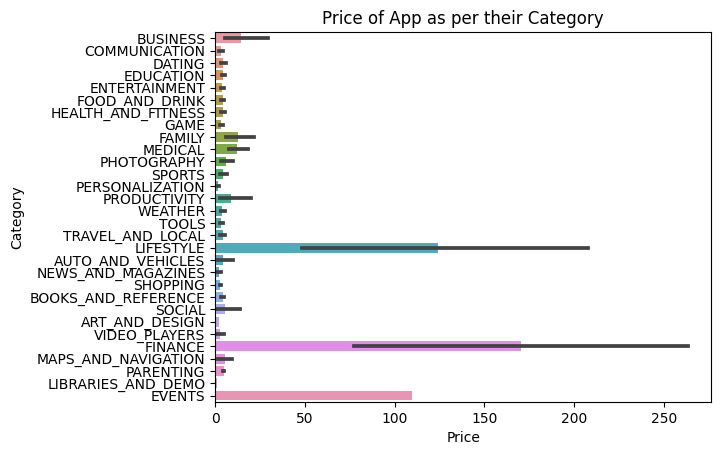

In [71]:
sns.barplot(data=paid_apps, y='Category', x='Price', orient='h')
plt.title('Price of App as per their Category')
plt.show()

# Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [95]:
playStore.Installs = playStore.Installs.astype('int')

In [96]:
temp = playStore.sort_values(by='Installs', ascending=False)

In [100]:
temp[['App', 'Installs']][:10]

,App,Installs
308,Hangouts,1000000000
3483,YouTube,1000000000
412,Gmail,1000000000
3549,Google Chrome: Fast & Secure,1000000000
1493,Subway Surfers,1000000000
3035,Google Drive,1000000000
2459,Google Photos,1000000000
755,Google Play Games,1000000000
2504,Google Photos,1000000000
375,Google Chrome: Fast & Secure,1000000000


# Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

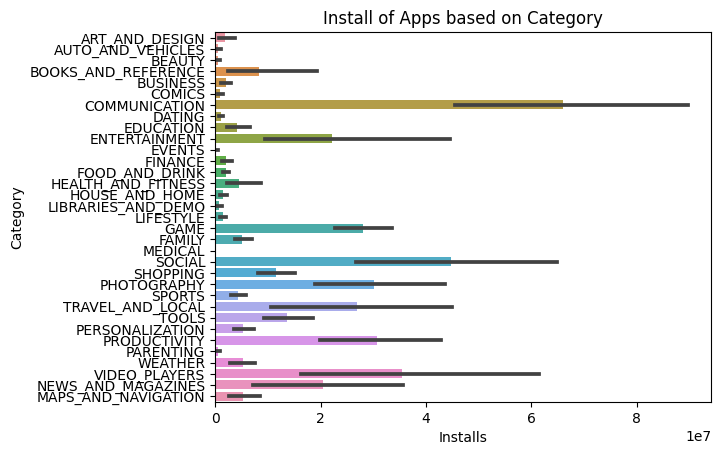

In [103]:
sns.barplot(data=playStore, y='Category', x='Installs', orient='h')
plt.title('Install of Apps based on Category')
plt.show()

In [112]:
paid_apps.Installs = paid_apps.Installs.str.replace(',','')
paid_apps.Installs = paid_apps.Installs.str.replace('+','')

In [115]:
paid_apps.Installs = paid_apps.Installs.astype('int')

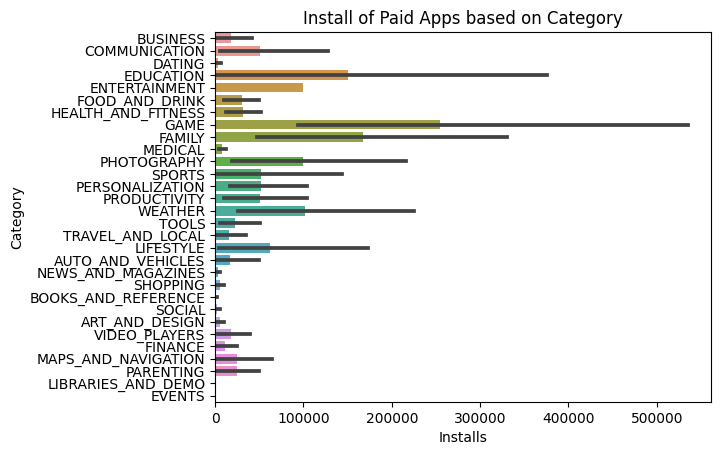

In [117]:
sns.barplot(data=paid_apps, y='Category', x='Installs', orient='h')
plt.title('Install of Paid Apps based on Category')
plt.show()

- As per first graph, we can see that categories like communication, social, video player are quite popular among users
- As per second graph, we can see that categories like game, family, education are quite popular among paid user.

# Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

To identify the most successful app developers in the Google Playstore dataset, we can analyze the following features:

- Developer: We can analyze the number of apps published by each developer to identify the most prolific developers.
- Rating: We can analyze the average rating of apps published by each developer to identify the developers with the highest-rated apps.
- Installs: We can analyze the total number of app installs for each developer to identify the most popular developers. <br> <br>

To present our findings, we can use the following data visualizations:

- Bar chart: We can use a bar chart to visualize the number of apps published by each developer.
- Scatter plot: We can use a scatter plot to visualize the relationship between the average rating and the number of app installs for each developer.
- Heatmap: We can use a heatmap to visualize the total number of app installs for each developer by app category.

# Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

To identify the best time to launch a new app on the Google Playstore, the following features can be analyzed:

- Number of Installs: The number of installs of the top apps can be analyzed to identify trends and patterns that indicate the best time to launch a new app.

- Reviews and Ratings: The reviews and ratings of the top apps can be analyzed to identify the most favorable time for launching a new app.

- Category: The category of the app can also play a significant role in identifying the best time to launch a new app. For instance, gaming apps may have a different trend as compared to education or productivity apps.

- Seasonal Trends: Some apps may have seasonal relevance. For example, an app related to tax filing may be launched around the tax season.

<br> <br>Data visualizations that can be used to present the findings include:

- Line charts: To show the trend of installs, ratings, and reviews over time.

- Heat maps: To show the popularity of app categories across different times of the year.

- Bar charts: To show the comparison of different categories or apps based on installs, ratings, or reviews.

- Scatter plots: To show the correlation between the number of installs and ratings or reviews over time.